In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn 

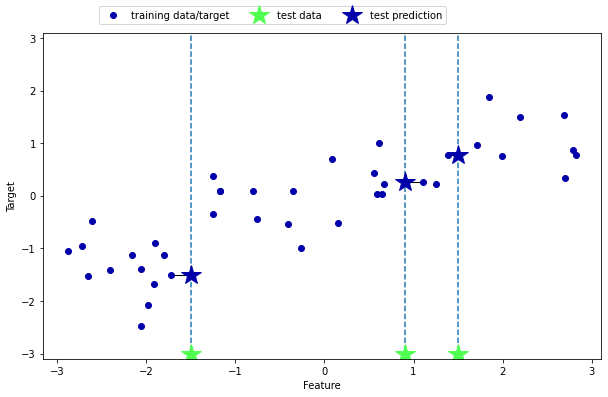

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

# Read the CSV and Perform Basic Data Cleaning

In [49]:
df = pd.read_csv("../Resources/new_all_data2.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
# df = df.drop(['ISO_Code_x'], axis = 1)
df.head()

,Country,2010_DR,2011_DR,2012_DR,2013_DR,2014_DR,2015_DR,2016_DR,2017_DR,2018_DR,...,2011_WAE,2012_WAE,2013_WAE,2014_WAE,2015_WAE,2016_WAE,2017_WAE,2018_WAE,2019_WAE,2020_WAE
0,Albania,54.0,53.5,53.0,52.6,52.1,51.6,51.1,50.6,50.1,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
1,Angola,99.7,99.3,102.0,105.0,108.0,111.0,114.0,117.0,119.0,...,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3
2,Armenia,43.8,44.5,45.2,45.9,46.5,47.2,47.9,48.6,49.3,...,15.3,16.4,17.5,18.7,19.8,20.9,22.1,23.2,24.4,25.5
3,Azerbaijan,50.9,50.9,50.9,50.9,50.9,50.9,50.9,50.9,50.9,...,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9
4,Bangladesh,68.5,67.8,66.3,64.9,63.4,61.8,60.2,58.5,56.9,...,7.1,19.3,31.6,43.8,56.0,68.3,80.5,92.7,105.0,117.0


In [50]:
df.columns.values

array(['Country', '2010_DR', '2011_DR', '2012_DR', '2013_DR', '2014_DR',
       '2015_DR', '2016_DR', '2017_DR', '2018_DR', '2019_DR', '2020_DR',
       '2010_SC', '2011_SC', '2012_SC', '2013_SC', '2014_SC', '2015_SC',
       '2016_SC', '2017_SC', '2018_SC', '2019_SC', '2020_SC', '2010_3BD',
       '2011_3BD', '2012_3BD', '2013_3BD', '2014_3BD', '2015_3BD',
       '2016_3BD', '2017_3BD', '2018_3BD', '2019_3BD', '2020_3BD',
       '2010_HOS', '2011_HOS', '2012_HOS', '2013_HOS', '2014_HOS',
       '2015_HOS', '2016_HOS', '2017_HOS', '2018_HOS', '2019_HOS',
       '2020_HOS', 'ISO_Code', 'GNI/C 2010', 'GNI/C 2011', 'GNI/C 2012',
       'GNI/C 2013', 'GNI/C 2014', 'GNI/C 2015', 'GNI/C 2016',
       'GNI/C 2017', 'GNI/C 2018', 'GNI/C 2019', 'GNI/C 2020',
       'LifeEx 2010', 'LifeEx 2011', 'LifeEx 2012', 'LifeEx 2013',
       'LifeEx 2014', 'LifeEx 2015', 'LifeEx 2016', 'LifeEx 2017',
       'LifeEx 2018', 'LifeEx 2019', 'LifeEx 2020', '2010_pop',
       '2011_pop', '2012_pop', '2013_pop',

In [51]:
# df_2010 = df[["2010_DR", "2010_SC", 'GNI/C 2011']].copy()
# df_2010.columns = ["DR", "SC", "GNI"]
# df_2011 = df[["2011_DR", "2011_SC", 'GNI/C 2012']].copy()
# df_2011.columns = ["DR", "SC", "GNI"]



# df_2020 = df[["County", "2011_DR", "2011_SC"]].copy()

In [52]:
df_2010 = df.filter( ["GNI/C 2011","2010_DR", "2010_SC","2010_3BD","2010_HOS","LifeEx 2010","2010_pop","2010_urb","2010_WLE","2010_WUE","2010_MYE","2010_MAE","2010_MLE","2010_MUE","2010_WAE"],axis=1).copy()
df_2010.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2011 = df.filter( ["GNI/C 2012","2011_DR", "2011_SC","2011_3BD","2011_HOS","LifeEx 2011","2011_pop","2011_urb","2011_WLE","2011_WUE","2011_MYE","2011_MAE","2011_MLE","2011_MUE","2011_WAE"],axis=1).copy()
df_2011.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2012 = df.filter( ["GNI/C 2013","2012_DR", "2012_SC","2012_3BD","2012_HOS","LifeEx 2012","2012_pop","2012_urb","2012_WLE","2012_WUE","2012_MYE","2012_MAE","2012_MLE","2012_MUE","2012_WAE"],axis=1).copy()
df_2012.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2013 = df.filter( ["GNI/C 2014","2013_DR", "2013_SC","2013_3BD","2013_HOS","LifeEx 2013","2013_pop","2013_urb","2013_WLE","2013_WUE","2013_MYE","2013_MAE","2013_MLE","2013_MUE","2013_WAE"],axis=1).copy()
df_2013.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2014 = df.filter( ["GNI/C 2015","2014_DR", "2014_SC","2014_3BD","2014_HOS","LifeEx 2014","2014_pop","2014_urb","2014_WLE","2014_WUE","2014_MYE","2014_MAE","2014_MLE","2014_MUE","2014_WAE"],axis=1).copy()
df_2014.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2015 = df.filter( ["GNI/C 2016","2015_DR", "2015_SC","2015_3BD","2015_HOS","LifeEx 2015","2015_pop","2015_urb","2015_WLE","2015_WUE","2015_MYE","2015_MAE","2015_MLE","2015_MUE","2015_WAE"],axis=1).copy()
df_2015.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2016 = df.filter( ["GNI/C 2017","2016_DR", "2016_SC","2016_3BD","2016_HOS","LifeEx 2016","2016_pop","2016_urb","2016_WLE","2016_WUE","2016_MYE","2016_MAE","2016_MLE","2016_MUE","2016_WAE"],axis=1).copy()
df_2016.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2017 = df.filter( ["GNI/C 2018","2017_DR", "2017_SC","2017_3BD","2017_HOS","LifeEx 2017","2017_pop","2017_urb","2017_WLE","2017_WUE","2017_MYE","2017_MAE","2017_MLE","2017_MUE","2017_WAE"],axis=1).copy()
df_2017.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2018 = df.filter( ["GNI/C 2019","2018_DR", "2018_SC","2018_3BD","2018_HOS","LifeEx 2018","2018_pop","2018_urb","2018_WLE","2018_WUE","2018_MYE","2018_MAE","2018_MLE","2018_MUE","2018_WAE"],axis=1).copy()
df_2018.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2019 = df.filter( ["GNI/C 2020","2019_DR", "2019_SC","2019_3BD","2019_HOS","LifeEx 2019","2019_pop","2019_urb","2019_WLE","2019_WUE","2019_MYE","2019_MAE","2019_MLE","2019_MUE","2019_WAE"],axis=1).copy()
df_2019.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

df_2010.head()
# df_2020 = df.filter( ["GNI/C 2021","2020_DR", "2020_SC","2020_3BD","2020_HOS","LifeEx 2020","2020_pop","2020_urb","2020_WLE","2020_WUE","2020_MYE","2020_MAE","2020_MLE","2020_MUE","2020_WAE"],axis=1).copy()
# df_2020.columns = ["GNI","DR","SC","3BD","HOS","LifeEx","pop","urb","WLE","WUE","MYE","MAE","MLE","MUE","WAE"]

,GNI,DR,SC,3BD,HOS,LifeEx,pop,urb,WLE,WUE,MYE,MAE,MLE,MUE,WAE
0,10.20,54.0,21.4,23.2,4.58,76.6,2.92,46.7,55.5,22.60,9.45,21.60,69.6,8.83,22.0
1,5.80,99.7,37.2,22.9,6.30,55.4,23.50,43.7,46.4,7.26,5.57,34.50,45.5,19.90,46.3
2,7.27,43.8,20.6,28.5,4.55,73.3,2.88,61.9,39.2,46.70,11.40,9.63,72.4,18.00,14.1
3,14.70,50.9,26.4,13.8,5.02,70.9,8.49,55.2,33.1,49.00,10.60,13.10,66.5,20.40,17.9
4,2.86,68.5,42.5,27.1,6.09,69.9,148.00,23.9,77.5,12.20,4.44,29.40,58.3,12.20,10.3


In [56]:
df_training = df_2010.append((df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019,), ignore_index=True)

df_training.head()

,GNI,DR,SC,3BD,HOS,LifeEx,pop,urb,WLE,WUE,MYE,MAE,MLE,MUE,WAE
0,10.20,54.0,21.4,23.2,4.58,76.6,2.92,46.7,55.5,22.60,9.45,21.60,69.6,8.83,22.0
1,5.80,99.7,37.2,22.9,6.30,55.4,23.50,43.7,46.4,7.26,5.57,34.50,45.5,19.90,46.3
2,7.27,43.8,20.6,28.5,4.55,73.3,2.88,61.9,39.2,46.70,11.40,9.63,72.4,18.00,14.1
3,14.70,50.9,26.4,13.8,5.02,70.9,8.49,55.2,33.1,49.00,10.60,13.10,66.5,20.40,17.9
4,2.86,68.5,42.5,27.1,6.09,69.9,148.00,23.9,77.5,12.20,4.44,29.40,58.3,12.20,10.3


In [57]:

X = df_training.drop(['GNI'], axis = 1)

y = df_training['GNI'].values.reshape(-1,1)

print(X.shape,y.shape)


(680, 14) (680, 1)


In [59]:
# model.predict(df_2020.drop(['GNI'], axis =1))

# Create a Train Test Split



In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)




In [61]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor(n_neighbors=7)

model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [62]:
# print(reg.score(reg.score(X_test, y_test)))

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9836708270806678
Testing Score: 0.9533387027583912


Text(0.5, 1.0, 'Residual Plot')

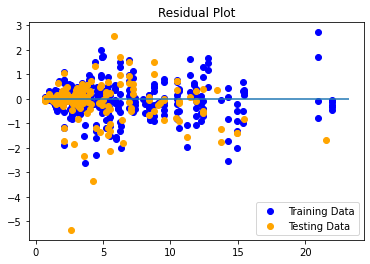

In [63]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [64]:
predicted_data =model.predict(X_test)

predicted_data

array([[ 5.84571429],
       [ 1.61285714],
       [ 1.93571429],
       [ 2.41714286],
       [ 2.59428571],
       [ 3.57571429],
       [ 3.01571429],
       [ 4.05857143],
       [ 2.76142857],
       [ 3.45428571],
       [ 1.47      ],
       [ 3.67      ],
       [ 6.27571429],
       [ 3.31142857],
       [ 1.79857143],
       [15.47142857],
       [ 2.        ],
       [ 3.06142857],
       [ 5.51285714],
       [ 9.10571429],
       [ 5.53571429],
       [ 3.01857143],
       [ 1.56714286],
       [ 3.83      ],
       [ 2.45142857],
       [ 1.6       ],
       [ 3.45428571],
       [ 2.        ],
       [10.47142857],
       [ 3.09428571],
       [ 9.53428571],
       [ 9.53428571],
       [ 2.14571429],
       [ 0.69571429],
       [ 6.39285714],
       [ 1.12714286],
       [ 3.17285714],
       [13.74571429],
       [ 2.30857143],
       [ 1.54714286],
       [ 3.19571429],
       [ 3.06857143],
       [ 3.19571429],
       [ 2.08      ],
       [ 1.64571429],
       [ 5